**회귀 분석**
- 연속된 수치형의 데이터를 예측할 때 사용하는 기법
- 설명변수 X
  - 각 특성의 데이터 스케일을 반드시 확인
  - 모두 동일한 스케일을 갖도록 전처리 필요
- 종속변수 y
  - 클래스 비율을 유지할 필요가 없음

**선형 회귀 모델**
- **LinearRegression**
  - ```python
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    ```
  - 학습 데이터를 예측하기 위해, 각 특성에 최적화된 가중치와 절편을 계산
     - 학습 결과로 나온 가중치는 학습 데이터에 맞는 가중치로, 과적합이 발생할 수 있음
     - 과적합이 발생하는 경우 L1 제약(Lasso) 또는 L2 제약(Ridge)을 통해 해결 가능
  - 가중치의 절대값이 클수록 영향력이 높은 특성으로, 다른 특성에 비해 가중치가 큰 특성은 중요한 특성임 
  - R2 Score
    - 회귀 모델 평가 지표로, 0.7 이상의 값을 갖는 것이 이상적임
  - 최적화된 가중치와 절편
    - 가중치 - `coef_`
    - 절편 - `intercept_`

**제약**
- **L1 제약** - **Lasso**
  - ```python
    from sklearn.linear_model import Lasso
    model = Lasso(alpha=alpha)
    ```
  - 모든 컬럼 중 특정 컬럼에 대해서만 가중치의 값을 할당하는 제약 조건
  - 그 외 컬럼의 가중치 값은 0으로 제약
  - 컬럼이 많은 데이터를 학습하는 경우 빠른 학습 속도를 보임
  - 모든 컬럼 중 중요도가 높은 컬럼을 구분할 수 있음 
- **L2 제약** - **Ridge**
  - ```python
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=alpha)
    ```
  - 모든 컬럼의 가중치 값을 0으로 수렴하게 제어하는 제약 조건 
  - 일반화 성능을 올리기 위해 모든 컬럼을 적절히 활용할 수 있도록 사용하는 제약 조건 
- Lasso와 Ridge의 하이퍼 파라미터 **alpha**
  - alpha 값이 커질수록 제약을 크게 설정함 => 모든 칼럼의 가중치 값이 0으로 수렴
  - alpha 값이 작아질수록 제약을 작게 설정함 => 모든 칼럼의 가중치 값이 0에서 발산 
  - alpha 값이 작아질수록 LinearRegression과 비슷해짐 

**차원 확장**
  - ```python
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree, include_bias=include_bias)
    ```
  - 선형 모델은 기본적으로 1차원 직선을 사용하여 데이터를 예측함
  - 차원을 확장함으로써 성능을 향상시킬 수 있음 
  - degree 
    - 생성할 다항식 차수
  - include_bias
    - 절편 생성 여부 

## Lecture 01 - 회귀 분석 with LinearRegression

In [52]:
# import pandas
import pandas as pd

pd.options.display.max_columns = 5
pd.options.display.max_rows = 10

In [53]:
# 1. load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [54]:
# 2. set X, y
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.Series(data=data.target)

print(X.head())

   MedInc  HouseAge  ...  Latitude  Longitude
0  8.3252      41.0  ...     37.88    -122.23
1  8.3014      21.0  ...     37.86    -122.22
2  7.2574      52.0  ...     37.85    -122.24
3  5.6431      52.0  ...     37.85    -122.25
4  3.8462      52.0  ...     37.85    -122.25

[5 rows x 8 columns]


In [55]:
# 3. check X, y
print(X.info())                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [56]:
print(X .isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [57]:
print(X.describe())

             MedInc      HouseAge  ...      Latitude     Longitude
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...     35.631861   -119.569704
std        1.899822     12.585558  ...      2.135952      2.003532
min        0.499900      1.000000  ...     32.540000   -124.350000
25%        2.563400     18.000000  ...     33.930000   -121.800000
50%        3.534800     29.000000  ...     34.260000   -118.490000
75%        4.743250     37.000000  ...     37.710000   -118.010000
max       15.000100     52.000000  ...     41.950000   -114.310000

[8 rows x 8 columns]


In [58]:
print(y.value_counts())

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Length: 3842, dtype: int64


In [59]:
print(y.value_counts() / len(y))

5.00001    0.046754
1.37500    0.005911
1.62500    0.005669
1.12500    0.004990
1.87500    0.004506
             ...   
3.59200    0.000048
0.54900    0.000048
3.77600    0.000048
0.81200    0.000048
0.47000    0.000048
Length: 3842, dtype: float64


In [60]:
# 4. split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

16512 4128
16512 4128


In [61]:
# 5. build model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f'SCORE(TRAIN): {score}')

score = model.score(X_test, y_test)
print(f' SCORE(TEST): {score}\n')

pred = model.predict(X_test[:10])
print(f'PREDICT: {pred}')
print(f' ANSWER: {y_test[:10].values}\n')

# weights and bias
print(f'WEIGHT: {model.coef_}')
print(f'  BIAS: {model.intercept_}\n')

# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
pred = model.predict(X_train)
print(f'R2 SCORE: {r2_score(y_train, pred)}')
print(f'     MAE: {mean_absolute_error(y_train, pred)}')
print(f'    MAPE: {mean_absolute_percentage_error(y_train, pred)}')
print(f'     MSE: {mean_squared_error(y_train, pred)}')

SCORE(TRAIN): 0.6091344591468112
 SCORE(TEST): 0.5931227033371754

PREDICT: [1.734586   1.86281658 2.71975929 2.64102015 3.17458074 2.1895522
 0.87793873 1.79392447 2.70148733 1.63569367]
 ANSWER: [1.474   1.481   1.929   3.875   5.00001 2.457   0.682   2.774   2.249
 2.129  ]

WEIGHT: [ 4.34022996e-01  9.14752327e-03 -9.83662123e-02  5.90497434e-01
 -6.52361175e-06 -4.68824210e-03 -4.22421899e-01 -4.34175832e-01]
  BIAS: -36.82608788677508

R2 SCORE: 0.6091344591468112
     MAE: 0.5308344448012711
    MAPE: 0.31633690299840994
     MSE: 0.5239047478101366


## Lecture 02 - 회귀 분석 with 제약

In [62]:
# import pandas
import pandas as pd

pd.options.display.max_columns = 5
pd.options.display.max_rows = 10

In [63]:
# 1. load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [64]:
# 2. set X, y
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.Series(data=data.target)

print(X.head())

   MedInc  HouseAge  ...  Latitude  Longitude
0  8.3252      41.0  ...     37.88    -122.23
1  8.3014      21.0  ...     37.86    -122.22
2  7.2574      52.0  ...     37.85    -122.24
3  5.6431      52.0  ...     37.85    -122.25
4  3.8462      52.0  ...     37.85    -122.25

[5 rows x 8 columns]


In [65]:
# 3. check X, y
print(X.info())                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [66]:
print(X .isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [67]:
print(X.describe())

             MedInc      HouseAge  ...      Latitude     Longitude
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...     35.631861   -119.569704
std        1.899822     12.585558  ...      2.135952      2.003532
min        0.499900      1.000000  ...     32.540000   -124.350000
25%        2.563400     18.000000  ...     33.930000   -121.800000
50%        3.534800     29.000000  ...     34.260000   -118.490000
75%        4.743250     37.000000  ...     37.710000   -118.010000
max       15.000100     52.000000  ...     41.950000   -114.310000

[8 rows x 8 columns]


In [68]:
print(y.value_counts())

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Length: 3842, dtype: int64


In [69]:
print(y.value_counts() / len(y))

5.00001    0.046754
1.37500    0.005911
1.62500    0.005669
1.12500    0.004990
1.87500    0.004506
             ...   
3.59200    0.000048
0.54900    0.000048
3.77600    0.000048
0.81200    0.000048
0.47000    0.000048
Length: 3842, dtype: float64


In [70]:
# 4. split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

16512 4128
16512 4128


In [71]:
# 5. build model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

score = linear_model.score(X_train, y_train)
print(f'SCORE(TRAIN): {score}')

score = linear_model.score(X_test, y_test)
print(f' SCORE(TEST): {score}\n')

pred = model.predict(X_test[:10])
print(f'PREDICT: {pred}')
print(f' ANSWER: {y_test[:10].values}\n')

# weights and bias
print(f'WEIGHT: {linear_model.coef_}')
print(f'  BIAS: {linear_model.intercept_}\n')

# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
pred = linear_model.predict(X_train)
print(f'R2 SCORE: {r2_score(y_train, pred)}')
print(f'     MAE: {mean_absolute_error(y_train, pred)}')
print(f'    MAPE: {mean_absolute_percentage_error(y_train, pred)}')
print(f'     MSE: {mean_squared_error(y_train, pred)}')

SCORE(TRAIN): 0.6040887571728685
 SCORE(TEST): 0.6126851800593788

PREDICT: [0.6487015  2.07371374 2.47559728 1.20303947 2.43879294 2.72314076
 5.88364454 2.3300876  1.90028376 1.7177314 ]
 ANSWER: [1.188   1.827   2.392   1.582   2.337   2.26    5.00001 1.745   2.306
 1.606  ]

WEIGHT: [ 4.42483244e-01  9.02135412e-03 -1.20446380e-01  6.59789936e-01
 -7.04174403e-06 -3.89327036e-03 -4.17648013e-01 -4.31049332e-01]
  BIAS: -36.60813938356414

R2 SCORE: 0.6040887571728685
     MAE: 0.532963809164766
    MAPE: 0.31873446634048536
     MSE: 0.5265932337369396


In [72]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

score = lasso_model.score(X_train, y_train)
print(f'SCORE(TRAIN): {score}')

score = lasso_model.score(X_test, y_test)
print(f' SCORE(TEST): {score}\n')

# weights and bias
print(f'WEIGHT: {lasso_model.coef_}')
print(f'  BIAS: {lasso_model.intercept_}\n')

# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
pred = lasso_model.predict(X_train)
print(f'R2 SCORE: {r2_score(y_train, pred)}')
print(f'     MAE: {mean_absolute_error(y_train, pred)}')
print(f'    MAPE: {mean_absolute_percentage_error(y_train, pred)}')
print(f'     MSE: {mean_squared_error(y_train, pred)}')

SCORE(TRAIN): 0.6040510880887605
 SCORE(TEST): 0.6129191328855998

WEIGHT: [ 4.38747468e-01  9.09299412e-03 -1.13253335e-01  6.23271098e-01
 -6.75452123e-06 -3.87686075e-03 -4.16573364e-01 -4.29407272e-01]
  BIAS: -36.43712103189487

R2 SCORE: 0.6040510880887605
     MAE: 0.5332172612990579
    MAPE: 0.31889140387779247
     MSE: 0.5266433365950214


In [73]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10000)
ridge_model.fit(X_train, y_train)

score = ridge_model.score(X_train, y_train)
print(f'SCORE(TRAIN): {score}')

score = ridge_model.score(X_test, y_test)
print(f' SCORE(TEST): {score}\n')

pred = model.predict(X_test[:10])
print(f'PREDICT: {pred}')
print(f' ANSWER: {y_test[:10].values}\n')

# weights and bias
print(f'WEIGHT: {ridge_model.coef_}')
print(f'  BIAS: {ridge_model.intercept_}\n')

# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
pred = ridge_model.predict(X_train)
print(f'R2 SCORE: {r2_score(y_train, pred)}')
print(f'     MAE: {mean_absolute_error(y_train, pred)}')
print(f'    MAPE: {mean_absolute_percentage_error(y_train, pred)}')
print(f'     MSE: {mean_squared_error(y_train, pred)}')

SCORE(TRAIN): 0.5475314362325117
 SCORE(TEST): 0.5646302812954354

PREDICT: [0.6487015  2.07371374 2.47559728 1.20303947 2.43879294 2.72314076
 5.88364454 2.3300876  1.90028376 1.7177314 ]
 ANSWER: [1.188   1.827   2.392   1.582   2.337   2.26    5.00001 1.745   2.306
 1.606  ]

WEIGHT: [ 3.54234575e-01  1.39665051e-02 -3.52488298e-03  1.42012638e-02
  1.30795506e-05 -3.82883352e-03 -1.61556039e-01 -1.49315745e-01]
  BIAS: -11.8023140248594

R2 SCORE: 0.5475314362325117
     MAE: 0.5810160464292603
    MAPE: 0.36232993322756
     MSE: 0.6018189391571935


## Lecture 03 - 차원 확장

In [74]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# 1. set X, y
X = np.arange(1, 11).reshape(-1, 1)
y = [5, 8, 10, 9, 7, 5, 3, 6, 9, 10]

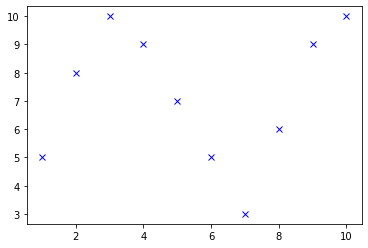

In [76]:
# 2. check X, y
plt.plot(X, y, 'xb')
plt.show()

SCORE: 0.00845665961945019

PREDICT: [6.87272727 6.94545455 7.01818182 7.09090909 7.16363636 7.23636364
 7.30909091 7.38181818 7.45454545 7.52727273]
 ANSWER: [5, 8, 10, 9, 7, 5, 3, 6, 9, 10]



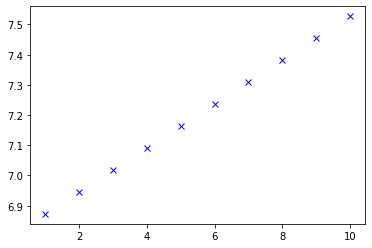

In [77]:
# 3. build model without 차원 확장
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

score = model.score(X, y)
print(f'SCORE: {score}\n')

pred = model.predict(X)
print(f'PREDICT: {pred}')
print(f' ANSWER: {y}\n')

plt.plot(X, pred, 'xb')
plt.show()

SCORE: 0.09302325581395354

PREDICT: [7.96363636 7.30909091 6.83636364 6.54545455 6.43636364 6.50909091
 6.76363636 7.2        7.81818182 8.61818182]
 ANSWER: [5, 8, 10, 9, 7, 5, 3, 6, 9, 10]



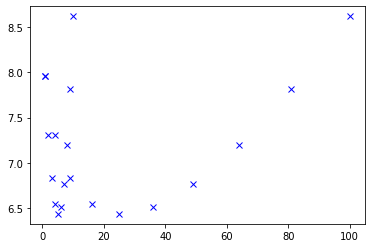

In [78]:
# 4. build model with 차원 확장 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

X = poly.fit_transform(X)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

score = model.score(X, y)
print(f'SCORE: {score}\n')

pred = model.predict(X)
print(f'PREDICT: {pred}')
print(f' ANSWER: {y}\n')

plt.plot(X, pred, 'xb')
plt.show()